# Importing modules

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from sklearn.inspection import permutation_importance

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from hyperopt import fmin, hp, tpe

# Importing the datasets

In [5]:
demographic_df = pd.read_csv('demographic.csv')
diet_df = pd.read_csv('diet.csv')
examination_df = pd.read_csv('examination.csv')
labs_df = pd.read_csv('labs.csv')
medications_df = pd.read_csv('medications.csv', encoding='iso-8859-1')
questionnaire_df = pd.read_csv('questionnaire.csv')

In [16]:
# Head of each datasets

In [6]:
# List of filenames
datasets = ['demographic.csv', 'diet.csv', 'examination.csv', 'labs.csv', 'medications.csv', 'questionnaire.csv']

# Loop through the list of filenames and display the head of each dataset
for dataset in datasets:
    if dataset == 'medications.csv':
        df = pd.read_csv(dataset, encoding='iso-8859-1')
    elif dataset == 'labs.csv':
        df = pd.read_csv(dataset, encoding='iso-8859-1')
    else:
        df = pd.read_csv(dataset)
    print(f"\nHead of {dataset}:")
    display(df.head())



Head of demographic.csv:


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00



Head of diet.csv:


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0



Head of examination.csv:


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0



Head of labs.csv:


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1



Head of medications.csv:


,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,1,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,1,INSULIN,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,1,GABAPENTIN,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,1,INSULIN GLARGINE,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,1,OLMESARTAN,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0



Head of questionnaire.csv:


,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


In [7]:
# Tail of each Datasets

In [8]:
# List of filenames
datasets = ['demographic.csv', 'diet.csv', 'examination.csv', 'labs.csv', 'medications.csv', 'questionnaire.csv']

# Loop through the list of filenames and display the head of each dataset
for dataset in datasets:
    if dataset == 'medications.csv':
        df = pd.read_csv(dataset, encoding='iso-8859-1')
    elif dataset == 'labs.csv':
        df = pd.read_csv(dataset, encoding='iso-8859-1')
    else:
        df = pd.read_csv(dataset)
    print(f"\nTail of {dataset}:")
    display(df.tail())


Tail of demographic.csv:


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
10170,83727,8,2,1,26,NaN,2,2,2.0,NaN,...,3.0,NaN,NaN,27141.631824,28115.568221,1,104,77.0,77.0,NaN
10171,83728,8,2,2,2,24.0,1,1,2.0,24.0,...,3.0,1.0,3.0,15274.475360,16512.138781,1,107,8.0,8.0,1.95
10172,83729,8,2,2,42,NaN,4,4,2.0,NaN,...,5.0,3.0,NaN,24122.248900,26902.344381,1,104,7.0,7.0,3.66
10173,83730,8,2,1,7,NaN,2,2,1.0,84.0,...,4.0,1.0,3.0,25521.878546,26686.025573,2,109,6.0,6.0,1.05
10174,83731,8,2,1,11,NaN,5,6,1.0,140.0,...,5.0,1.0,5.0,8930.180154,9700.873491,2,106,15.0,15.0,5.00



Tail of diet.csv:


,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
9808,83727,14146.781331,10520.302070,1,59.0,2.0,2.0,8.0,7.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9809,83728,38750.761193,51815.103262,1,25.0,2.0,2.0,9.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,15272.505199,10401.781170,1,59.0,2.0,2.0,1.0,6.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
9811,83730,0.000000,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9812,83731,5805.674812,4339.132077,1,49.0,2.0,2.0,12.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tail of examination.csv:


,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
9808,83727,1,611.0,NaN,NaN,1.0,3.0,60.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9809,83728,1,124.0,NaN,110.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,1,679.0,NaN,NaN,1.0,4.0,80.0,1.0,1.0,...,1.0,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0
9811,83730,1,381.0,NaN,72.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9812,83731,1,498.0,NaN,NaN,1.0,3.0,90.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tail of labs.csv:


,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
9808,83727,1.9,1.9,47.0,4154.8,4.04,67775.162806,88.0,0.88,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,531.4
9809,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,6.0,6.0,117.0,10342.8,5.13,NaN,NaN,NaN,4.1,...,0.135,0.0,0.132,0.0,0.0081,0.0,2.0,9.75,388.0,286.3
9811,83730,4.5,4.5,86.0,7602.4,5.23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9812,83731,5.3,5.3,114.0,10077.6,4.65,NaN,NaN,NaN,NaN,...,0.242,0.0,0.932,0.0,0.0061,0.0,NaN,7.25,NaN,NaN



Tail of medications.csv:


,SEQN,RXDUSE,RXDDRUG,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
20189,83727,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20190,83728,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20191,83729,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20192,83730,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20193,83731,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Tail of questionnaire.csv:


,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
10170,83727,NaN,NaN,NaN,3.0,NaN,1.0,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,150.0,26.0,NaN,NaN,NaN
10171,83728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10172,83729,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0,135.0,NaN,195.0,42.0,NaN,NaN,NaN
10173,83730,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10174,83731,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0


# Preprocess the data

In [9]:
# Handling missing values
demographic_df.fillna(demographic_df.mean(), inplace=True)
diet_df.dropna(inplace=True)

# Converting categorical variables to numeric
#  examination_df['DIQ010'] = pd.to_numeric(examination_df['DIQ010'], errors='coerce')

# Renaming columns
demographic_df.rename(columns={'SEQN':'id', 'RIAGENDR':'gender', 'RIDAGEYR':'age'}, inplace=True)

# Removing irrelevant columns
# labs_df.drop(['LBXPLTSI'], axis=1, inplace=True)

# Removing rows that don't meet certain criteria
questionnaire_df = questionnaire_df[questionnaire_df['SMD100BR'] == 1]

# Merging the Datasets

In [10]:
demographic_df = pd.read_csv('demographic.csv')
diet_df = pd.read_csv('diet.csv')
examination_df = pd.read_csv('examination.csv')
labs_df = pd.read_csv('labs.csv')
medications_df = pd.read_csv('medications.csv', encoding='iso-8859-1')
questionnaire_df = pd.read_csv('questionnaire.csv')

# merge all DataFrames
merged_df = pd.merge(demographic_df, questionnaire_df)
merged_df = pd.merge(merged_df, examination_df)
merged_df = pd.merge(merged_df, diet_df)
merged_df = pd.merge(merged_df, labs_df)
merged_df = pd.merge(merged_df, medications_df)

# view the merged DataFrame
merged_df.head()


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [11]:
# assuming the dataset is stored in a variable called `df`
for column_name in merged_df.columns:
    print(column_name)
print(f"Number of columns: {df.shape[1]}")

SEQN
SDDSRVYR
RIDSTATR
RIAGENDR
RIDAGEYR
RIDAGEMN
RIDRETH1
RIDRETH3
RIDEXMON
RIDEXAGM
DMQMILIZ
DMQADFC
DMDBORN4
DMDCITZN
DMDYRSUS
DMDEDUC3
DMDEDUC2
DMDMARTL
RIDEXPRG
SIALANG
SIAPROXY
SIAINTRP
FIALANG
FIAPROXY
FIAINTRP
MIALANG
MIAPROXY
MIAINTRP
AIALANGA
DMDHHSIZ
DMDFMSIZ
DMDHHSZA
DMDHHSZB
DMDHHSZE
DMDHRGND
DMDHRAGE
DMDHRBR4
DMDHREDU
DMDHRMAR
DMDHSEDU
WTINT2YR
WTMEC2YR
SDMVPSU
SDMVSTRA
INDHHIN2
INDFMIN2
INDFMPIR
ACD011A
ACD011B
ACD011C
ACD040
ACD110
ALQ101
ALQ110
ALQ120Q
ALQ120U
ALQ130
ALQ141Q
ALQ141U
ALQ151
ALQ160
BPQ020
BPQ030
BPD035
BPQ040A
BPQ050A
BPQ056
BPD058
BPQ059
BPQ080
BPQ060
BPQ070
BPQ090D
BPQ100D
CBD070
CBD090
CBD110
CBD120
CBD130
HSD010
HSQ500
HSQ510
HSQ520
HSQ571
HSQ580
HSQ590
HSAQUEX
CSQ010
CSQ020
CSQ030
CSQ040
CSQ060
CSQ070
CSQ080
CSQ090A
CSQ090B
CSQ090C
CSQ090D
CSQ100
CSQ110
CSQ120A
CSQ120B
CSQ120C
CSQ120D
CSQ120E
CSQ120F
CSQ120G
CSQ120H
CSQ140
CSQ160
CSQ170
CSQ180
CSQ190
CSQ200
CSQ202
CSQ204
CSQ210
CSQ220
CSQ240
CSQ250
CSQ260
AUQ136
AUQ138
CDQ001
CDQ002
CDQ003
CDQ004
CD

# Analyzing the data

In [12]:
# Create a new dataset and copy all columns from the original dataset
new_df_age = merged_df.copy()

# Rename the 'RIDAGEYR' column to 'age'
new_df_age = new_df_age.rename(columns={'RIDAGEYR': 'age'})

# Display the new dataset
display(new_df_age.head())

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,age,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,RXDDRGID,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,d00262,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0
2,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d03182,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0
3,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04538,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0
4,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,d04801,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0


In [13]:
# create a new dataframe with the column "gender"
new_df_gender = merged_df.copy()
new_df_gender['gender'] = merged_df['RIAGENDR'].map({1: 'Male', 2: 'Female'})

# display the new dataframe
display(new_df_gender.head())

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,RXQSEEN,RXDDAYS,RXDRSC1,RXDRSC2,RXDRSC3,RXDRSD1,RXDRSD2,RXDRSD3,RXDCOUNT,gender
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Male
1,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,2.0,1460.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,2.0,Male
2,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,1.0,243.0,G25.81,NaN,NaN,Restless legs syndrome,NaN,NaN,4.0,Male
3,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,1.0,365.0,E11,NaN,NaN,Type 2 diabetes mellitus,NaN,NaN,4.0,Male
4,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,1.0,14.0,E11.2,NaN,NaN,Type 2 diabetes mellitus with kidney complicat...,NaN,NaN,4.0,Male


In [14]:
# merging these 2 col separetly into a new df to visualize

In [15]:
# Create a new dataset and copy 'age', 'gender' and 'BPXSY1' columns from the original dataset
new_df = merged_df.loc[:, ['RIDAGEYR', 'RIAGENDR', 'BPXSY1']].copy()

# Rename the 'RIDAGEYR' column to 'age'
new_df = new_df.rename(columns={'RIDAGEYR': 'age'})

# Create a new column 'gender' using the 'RIAGENDR' column
new_df['gender'] = new_df['RIAGENDR'].map({1: 'Male', 2: 'Female'})

# Select the 'age', 'gender', and 'BPXSY1' columns and assign the result to new_df
new_df = new_df.loc[:, ['age', 'gender', 'BPXSY1']]

# Display the new dataset with only the 'age', 'gender', and 'BPXSY1' columns
display(new_df.head())


,age,gender,BPXSY1
0,69,Male,122.0
1,69,Male,122.0
2,54,Male,156.0
3,54,Male,156.0
4,54,Male,156.0


In [16]:
# Create a new dataset and copy 'age', 'gender', 'BPXSY1', and 'WTMEC2YR' columns from the original dataset
new_df_year = merged_df.loc[:, ['RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'WTMEC2YR']].copy()

# Rename the 'RIDAGEYR' column to 'age'
new_df_year = new_df_year.rename(columns={'RIDAGEYR': 'age'})

# Create a new column 'gender' using the 'RIAGENDR' column
new_df_year['gender'] = new_df_year['RIAGENDR'].map({1: 'Male', 2: 'Female'})

# Select the 'age', 'gender', 'BPXSY1', and 'WTMEC2YR' columns and assign the result to new_df
new_df_year = new_df_year.loc[:, ['age', 'gender', 'BPXSY1', 'WTMEC2YR']]

# Display the new dataset with the 'age', 'gender', 'BPXSY1', and 'WTMEC2YR' columns
display(new_df_year.head())

,age,gender,BPXSY1,WTMEC2YR
0,69,Male,122.0,13481.042095
1,69,Male,122.0,13481.042095
2,54,Male,156.0,24471.769625
3,54,Male,156.0,24471.769625
4,54,Male,156.0,24471.769625


In [17]:
# Checking weather 'BPXSY1' prsent in examination_df dataset

In [18]:
# Read the examination.csv file
examination_df = pd.read_csv('examination.csv')

# Check if 'BPXSY1' is present in examination_df
for col in examination_df.columns:
    if 'BPXSY1' in col:
        print(f"'BPXSY1' is present in column '{col}' of examination_df")

'BPXSY1' is present in column 'BPXSY1' of examination_df


In [19]:
import pandas as pd

csv_files = ['demographic.csv', 'diet.csv', 'examination.csv', 'labs.csv', 'medications.csv', 'questionnaire.csv']

for file in csv_files:
    try:
        df = pd.read_csv(file)
        if 'WTMEC2YR' in df.columns:
            print(f"'WTMEC2YR' is present in file {file}")
        else:
            print(f"'WTMEC2YR' is not present in file {file}")
    except UnicodeDecodeError:
        print(f"Error: Could not decode file {file}. Check file encoding or fix encoding issues.")

'WTMEC2YR' is present in file demographic.csv
'WTMEC2YR' is not present in file diet.csv
'WTMEC2YR' is not present in file examination.csv
'WTMEC2YR' is not present in file labs.csv
Error: Could not decode file medications.csv. Check file encoding or fix encoding issues.
'WTMEC2YR' is not present in file questionnaire.csv


<AxesSubplot:xlabel='age', ylabel='BPXSY1'>

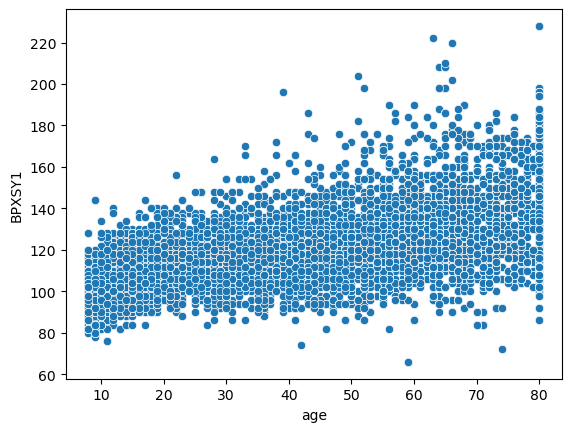

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='age', y='BPXSY1', data=new_df)

<AxesSubplot:xlabel='BPXSY1', ylabel='Count'>

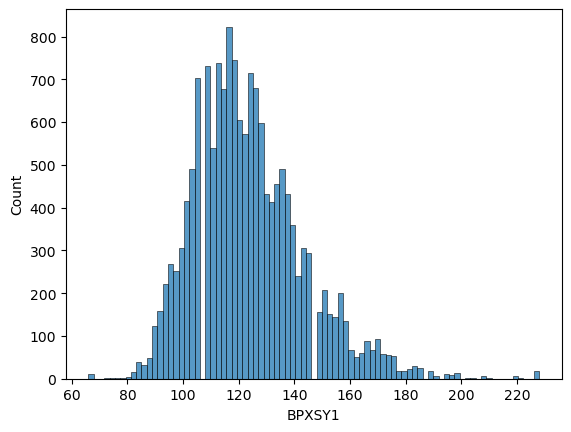

In [21]:
# Histogram
sns.histplot(x='BPXSY1', data=new_df)

<AxesSubplot:xlabel='gender', ylabel='BPXSY1'>

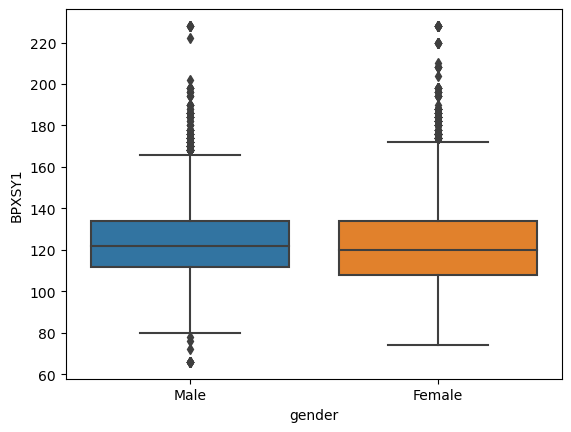

In [22]:
# Box plot
sns.boxplot(x='gender', y='BPXSY1', data=new_df)

<AxesSubplot:>

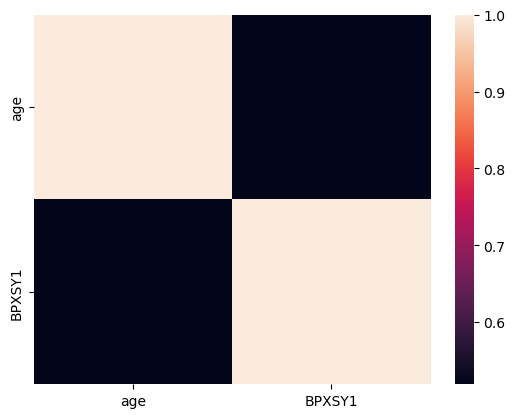

In [23]:
sns.heatmap(new_df.corr())

<AxesSubplot:xlabel='gender', ylabel='BPXSY1'>

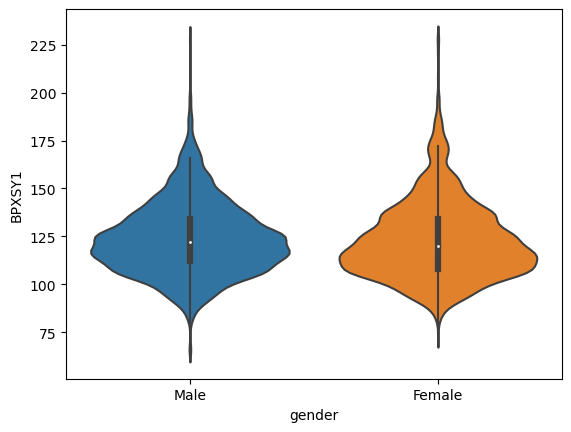

In [24]:
sns.violinplot(x='gender', y='BPXSY1', data=new_df)

<AxesSubplot:xlabel='gender', ylabel='BPXSY1'>

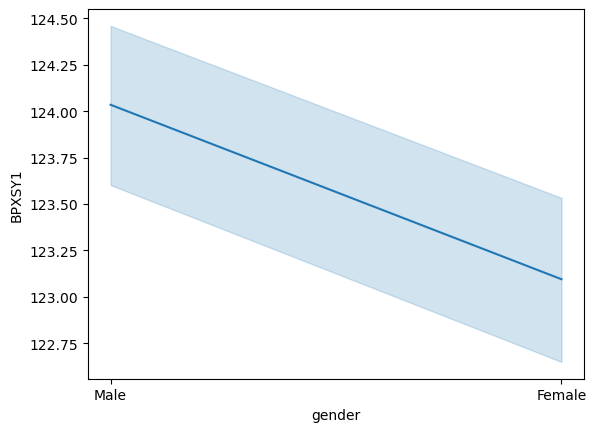

In [25]:
sns.lineplot(x='gender', y='BPXSY1', data=new_df)

In [26]:
if 'ALQ101' in merged_df.columns and 'DR1TALCO' in merged_df.columns and 'LBXGLU' in merged_df.columns:
    print("All columns are present")
else:
    missing_cols = []
    if 'ALQ101' not in merged_df.columns:
        missing_cols.append('ALQ101')
    if 'DR1TALCO' not in merged_df.columns:
        missing_cols.append('DR1TALCO')
    if 'LBXGLU' not in merged_df.columns:
        missing_cols.append('LBXGLU')
    print("The following columns are missing:", missing_cols)


The following columns are missing: ['LBXGLU']


In [27]:
# Read the labs.csv file
labs_df = pd.read_csv('labs.csv')

# Check if 'LBXGLU' is present in labs_df
lbxglu_present = False
for col in labs_df.columns:
    if 'LBXGLT' in col:
        lbxglu_present = True
        print(f"'LBXGLT' is present in column '{col}' of labs_df")

if not lbxglu_present:
    print("LBXGLT is not present in labs_df")

'LBXGLT' is present in column 'LBXGLT' of labs_df


In [28]:
labs_df = pd.read_csv('labs.csv')
print(labs_df.columns.tolist())

['SEQN', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'LBXSAL', 'LBDSALSI', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBDSBUSI', 'LBXSC3SI', 'LBXSCA', 'LBDSCASI', 'LBXSCH', 'LBDSCHSI', 'LBXSCK', 'LBXSCLSI', 'LBXSCR', 'LBDSCRSI', 'LBXSGB', 'LBDSGBSI', 'LBXSGL', 'LBDSGLSI', 'LBXSGTSI', 'LBXSIR', 'LBDSIRSI', 'LBXSKSI', 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH', 'LBDSPHSI', 'LBXSTB', 'LBDSTBSI', 'LBXSTP', 'LBDSTPSI', 'LBXSTR', 'LBDSTRSI', 'LBXSUA', 'LBDSUASI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW', 'LBXPLTSI', 'LBXMPSI', 'URXUCL', 'WTSA2YR.x', 'LBXSCU', 'LBDSCUSI', 'LBXSSE', 'LBDSSESI', 'LBXSZN', 'LBDSZNSI', 'URXUCR.y', 'WTSB2YR.x', 'URXBP3', 'URDBP3LC', 'URXBPH', 'URDBPHLC', 'URXBPF', 'URDBPFLC', 'URXBPS', 'URDBPSLC', 'URXTLC', 'URDTLCLC', 'URXTRS', 'URDTRSLC', 'URXBUP', 'URDBU

In [29]:
df = pd.read_sas('AMDGYD_H.XPT', format='xport')
# View first 5 rows of the dataframe
display(df.head())

,SEQN,WTSA2YR,LBXACR,LBDACRLC,LBXGLY,LBDGLYLC
0,73560.0,183653.604036,42.6,5.397605e-79,NaN,NaN
1,73564.0,194847.483347,24.0,5.397605e-79,29.9,5.397605e-79
2,73567.0,100284.090673,148.0,5.397605e-79,51.6,5.397605e-79
3,73583.0,163017.304491,NaN,NaN,NaN,NaN
4,73585.0,55880.049721,NaN,NaN,NaN,NaN


In [30]:
df = pd.read_sas('AMDGYD_H.XPT', format='xport')
if 'LBXGLU' in df.columns:
    print("LBXGLU column is present in the dataframe.")
else:
    print("LBXGLY column is not present in the dataframe.")

LBXGLY column is not present in the dataframe.


In [31]:
# Rename 'new_df' to 'new_model_df'
new_model_df = new_df.copy()

# Modify 'new_model_df'
new_model_df['age_group'] = pd.cut(new_model_df['age'], bins=[18, 30, 45, 60, 100], labels=['18-29', '30-44', '45-59', '60+'])
new_model_df['is_hypertensive'] = (new_model_df['BPXSY1'] >= 130).astype(int)

# Add new columns from 'merged_df'
new_model_df[['ALQ101', 'DR1TALCO', 'LBXGLT']] = merged_df[['ALQ101', 'DR1TALCO', 'LBXGLT']]

# Display the modified 'new_model_df'
display(new_model_df.head())

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
0,69,Male,122.0,60+,0,1.0,0.0,NaN
1,69,Male,122.0,60+,0,1.0,0.0,NaN
2,54,Male,156.0,45-59,1,1.0,119.0,NaN
3,54,Male,156.0,45-59,1,1.0,119.0,NaN
4,54,Male,156.0,45-59,1,1.0,119.0,NaN


In [32]:
display(new_model_df.tail(20))

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
19560,60,Female,114.0,45-59,0,1.0,NaN,108.0
19561,60,Female,114.0,45-59,0,1.0,NaN,108.0
19562,60,Female,114.0,45-59,0,1.0,NaN,108.0
19563,3,Male,NaN,NaN,0,NaN,NaN,NaN
19564,36,Male,130.0,30-44,1,2.0,NaN,NaN
19565,52,Male,108.0,45-59,0,1.0,0.0,NaN
19566,0,Male,NaN,NaN,0,NaN,0.0,NaN
19567,61,Male,NaN,60+,0,1.0,0.0,NaN
19568,80,Male,164.0,60+,1,1.0,0.0,NaN
19569,80,Male,164.0,60+,1,1.0,0.0,NaN


In [33]:
def null_values():
    for column in new_model_df.columns:
        null_count = new_model_df[column].isnull().sum()
        print(f"Number of null values in column '{column}': {null_count}")
null_values()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'BPXSY1': 3858
Number of null values in column 'age_group': 4619
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'ALQ101': 5543
Number of null values in column 'DR1TALCO': 2361
Number of null values in column 'LBXGLT': 14871


In [34]:
median_bpxsy1 = new_model_df['BPXSY1'].median()
new_model_df['BPXSY1'].fillna(median_bpxsy1, inplace=True)

In [35]:
display(new_model_df.tail(20))

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
19560,60,Female,114.0,45-59,0,1.0,NaN,108.0
19561,60,Female,114.0,45-59,0,1.0,NaN,108.0
19562,60,Female,114.0,45-59,0,1.0,NaN,108.0
19563,3,Male,120.0,NaN,0,NaN,NaN,NaN
19564,36,Male,130.0,30-44,1,2.0,NaN,NaN
19565,52,Male,108.0,45-59,0,1.0,0.0,NaN
19566,0,Male,120.0,NaN,0,NaN,0.0,NaN
19567,61,Male,120.0,60+,0,1.0,0.0,NaN
19568,80,Male,164.0,60+,1,1.0,0.0,NaN
19569,80,Male,164.0,60+,1,1.0,0.0,NaN


In [36]:
new_model_df.head()

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
0,69,Male,122.0,60+,0,1.0,0.0,NaN
1,69,Male,122.0,60+,0,1.0,0.0,NaN
2,54,Male,156.0,45-59,1,1.0,119.0,NaN
3,54,Male,156.0,45-59,1,1.0,119.0,NaN
4,54,Male,156.0,45-59,1,1.0,119.0,NaN


In [37]:
new_model_df.tail()

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
19575,26,Male,110.0,18-29,0,1.0,14.0,108.0
19576,2,Female,120.0,NaN,0,NaN,0.0,NaN
19577,42,Female,136.0,30-44,1,NaN,0.0,NaN
19578,7,Male,120.0,NaN,0,NaN,NaN,NaN
19579,11,Male,94.0,NaN,0,NaN,0.0,NaN


In [38]:
null_values()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'BPXSY1': 0
Number of null values in column 'age_group': 4619
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'ALQ101': 5543
Number of null values in column 'DR1TALCO': 2361
Number of null values in column 'LBXGLT': 14871


In [39]:
# dropping null values inside age_group col

new_model_df.dropna(subset=['age_group'], inplace=True)

In [40]:
new_model_df.tail() # worked~

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
19571,80,Male,164.0,60+,1,1.0,0.0,NaN
19572,80,Male,164.0,60+,1,1.0,0.0,NaN
19574,40,Male,120.0,30-44,0,NaN,NaN,NaN
19575,26,Male,110.0,18-29,0,1.0,14.0,108.0
19577,42,Female,136.0,30-44,1,NaN,0.0,NaN


# Model Building

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Drop rows with missing values
new_model_df.dropna(inplace=True)

# One-hot encode categorical features and create X and y
X = pd.get_dummies(new_model_df[['age', 'gender', 'ALQ101', 'DR1TALCO']])
y = new_model_df['LBXGLT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the logistic regression model
lr = LogisticRegression(max_iter=5000, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [47]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Compute the classification report with zero_division parameter
report = classification_report(y_test, y_pred, zero_division=1)
print(report)

              precision    recall  f1-score   support

        40.0       1.00      0.00      0.00         3
        45.0       0.00      1.00      0.00         0
        47.0       1.00      0.00      0.00         1
        48.0       1.00      0.00      0.00         4
        50.0       1.00      0.00      0.00         2
        52.0       1.00      0.00      0.00         1
        56.0       1.00      0.00      0.00         4
        57.0       1.00      0.00      0.00         1
        58.0       1.00      0.00      0.00         5
        59.0       1.00      0.00      0.00         4
        60.0       1.00      0.00      0.00         3
        61.0       1.00      0.00      0.00         2
        62.0       1.00      0.00      0.00         2
        63.0       1.00      0.00      0.00         1
        64.0       1.00      0.00      0.00         3
        65.0       1.00      0.00      0.00         1
        66.0       1.00      0.00      0.00         5
        67.0       1.00    

In [48]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

# Print the first 10 predicted values
print(y_pred[:10])

[ 92. 108. 219.  92. 130. 124.  92.  86. 124. 108.]


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Drop rows with missing values
new_model_df.dropna(inplace=True)

# One-hot encode categorical features and create X and y
X = pd.get_dummies(new_model_df[['age', 'gender', 'ALQ101', 'DR1TALCO']])
y = new_model_df['LBXGLT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [50]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the first 10 predicted values
print(y_pred[:10])

[168. 106. 294.  70.  98.  92. 120.  88. 117. 126.]


In [51]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the first 10 predicted values
print(y_pred[:10])

[168. 106. 294.  70.  98.  92. 120.  88. 117. 126.]


In [52]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3444302176696543


# Mission: imporving accuracy of Model [Current Accuracy: 0.352112676056338]

In [53]:
new_model_df.head(1)

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
24,61,Female,118.0,60+,0,2.0,34.2,150.0


In [55]:
new_model_df2 = new_model_df.copy()

In [56]:
new_model_df2.head()

,age,gender,BPXSY1,age_group,is_hypertensive,ALQ101,DR1TALCO,LBXGLT
24,61,Female,118.0,60+,0,2.0,34.2,150.0
25,61,Female,118.0,60+,0,2.0,34.2,150.0
26,61,Female,118.0,60+,0,2.0,34.2,150.0
31,26,Female,106.0,18-29,0,1.0,28.1,80.0
43,32,Male,118.0,30-44,0,1.0,0.0,84.0


In [57]:
new_model_df2.rename(columns={'BPXSY1': 'Blood_pressure', 'ALQ101': 'Alcohol', 'DR1TALCO': 'AlcoholGrams', 'LBXGLT': 'Glucose'}, inplace=True)

In [58]:
new_model_df2.head(10)

,age,gender,Blood_pressure,age_group,is_hypertensive,Alcohol,AlcoholGrams,Glucose
24,61,Female,118.0,60+,0,2.0,34.2,150.0
25,61,Female,118.0,60+,0,2.0,34.2,150.0
26,61,Female,118.0,60+,0,2.0,34.2,150.0
31,26,Female,106.0,18-29,0,1.0,28.1,80.0
43,32,Male,118.0,30-44,0,1.0,0.0,84.0
46,38,Female,124.0,30-44,0,1.0,0.0,81.0
47,50,Male,138.0,45-59,1,2.0,0.0,100.0
62,57,Female,128.0,45-59,0,1.0,0.0,164.0
80,75,Male,120.0,60+,0,1.0,0.0,113.0
81,75,Male,120.0,60+,0,1.0,0.0,113.0


In [59]:
new_model_df2.tail(10)

,age,gender,Blood_pressure,age_group,is_hypertensive,Alcohol,AlcoholGrams,Glucose
19541,38,Female,110.0,30-44,0,2.0,0.0,73.0
19542,38,Female,110.0,30-44,0,2.0,0.0,73.0
19543,61,Male,124.0,60+,0,1.0,0.0,208.0
19544,61,Male,124.0,60+,0,1.0,0.0,208.0
19545,61,Male,124.0,60+,0,1.0,0.0,208.0
19546,61,Male,124.0,60+,0,1.0,0.0,208.0
19547,61,Male,124.0,60+,0,1.0,0.0,208.0
19548,61,Male,124.0,60+,0,1.0,0.0,208.0
19549,61,Male,124.0,60+,0,1.0,0.0,208.0
19575,26,Male,110.0,18-29,0,1.0,14.0,108.0


In [60]:
new_model_df2.describe()

,age,Blood_pressure,is_hypertensive,Alcohol,AlcoholGrams,Glucose
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,55.016645,123.309603,0.301152,1.322151,8.460307,126.374392
std,17.686216,18.132444,0.458818,0.710852,22.225689,50.854604
min,19.000000,66.000000,0.000000,1.000000,0.000000,40.000000
25%,41.000000,112.000000,0.000000,1.000000,0.000000,93.000000
50%,57.000000,120.000000,0.000000,1.000000,0.000000,116.000000
75%,69.000000,134.000000,1.000000,2.000000,0.000000,146.000000
max,80.000000,220.000000,1.000000,9.000000,308.900000,604.000000


# Correlation Analysis

In [61]:
# Calculate the correlation coefficients between all numerical variables in new_model_df
corr_matrix = new_model_df2.corr()

# Print the correlation matrix
display(corr_matrix)

,age,Blood_pressure,is_hypertensive,Alcohol,AlcoholGrams,Glucose
age,1.000000,0.340308,0.291649,0.066094,-0.083011,0.324076
Blood_pressure,0.340308,1.000000,0.780741,0.059588,-0.003532,0.242065
is_hypertensive,0.291649,0.780741,1.000000,0.038601,-0.000284,0.173953
Alcohol,0.066094,0.059588,0.038601,1.000000,-0.165839,0.061603
AlcoholGrams,-0.083011,-0.003532,-0.000284,-0.165839,1.000000,-0.056565
Glucose,0.324076,0.242065,0.173953,0.061603,-0.056565,1.000000


AxesSubplot(0.125,0.11;0.62x0.77)


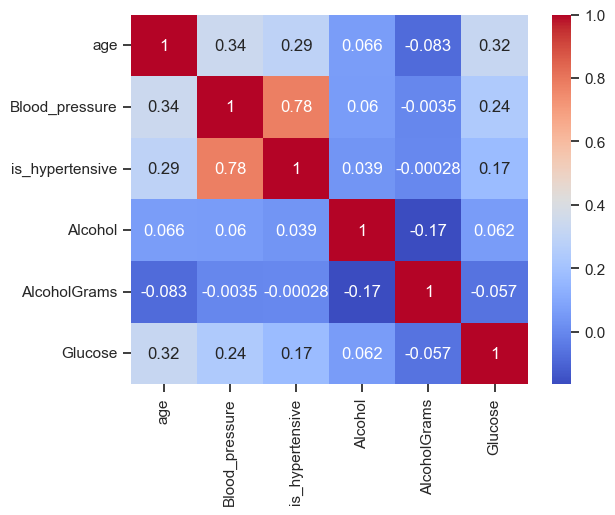

In [386]:
# Create a heatmap of the correlation matrix
print(sns.heatmap(corr_matrix, annot=True, cmap='coolwarm'))

In [62]:
# Calculate the correlation coefficient between two variables
corr_coefficient = new_model_df2['AlcoholGrams'].corr(new_model_df2['Blood_pressure'])

# Print the correlation coefficient
print(corr_coefficient)

-0.003532247930945078


In [419]:
# from the above result i understood:
# there is a weak positive correlation between the two variables 'AlcoholGrams' and 'Blood_pressure'.

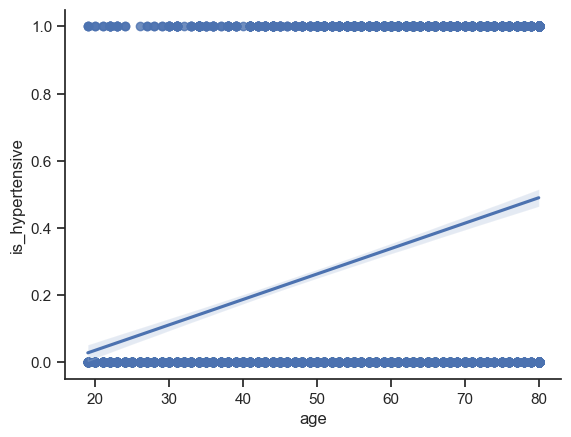

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

fig, ax = plt.subplots()

sns.regplot(x="age", y="is_hypertensive", data=new_model_df2, ax=ax)
sns.despine()

In [64]:
# Calculate the correlation coefficient between two variables
corr_coefficient = new_model_df2['age'].corr(new_model_df2['is_hypertensive'])

# Print the correlation coefficient
print(corr_coefficient)

0.2916488125075194


In [65]:
def null_values2():
    for column in new_model_df2.columns:
        null_count = new_model_df2[column].isnull().sum()
        print(f"Number of null values in column '{column}': {null_count}")
null_values2()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'Blood_pressure': 0
Number of null values in column 'age_group': 0
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'Alcohol': 0
Number of null values in column 'AlcoholGrams': 0
Number of null values in column 'Glucose': 0


In [228]:
# This suggests that as age increases, the likelihood of being hypertensive also increases.

In [423]:
null_values2()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'Blood_pressure': 0
Number of null values in column 'age_group': 0
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'Alcohol': 0
Number of null values in column 'AlcoholGrams': 0
Number of null values in column 'Glucose': 0


In [424]:
median_bp = new_model_df2['Blood_pressure'].median()
new_model_df2['Blood_pressure'].fillna(median_bp, inplace=True)

In [425]:
null_values2()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'Blood_pressure': 0
Number of null values in column 'age_group': 0
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'Alcohol': 0
Number of null values in column 'AlcoholGrams': 0
Number of null values in column 'Glucose': 0


In [426]:
median_alcohol = new_model_df2['AlcoholGrams'].median()
new_model_df2['AlcoholGrams'].fillna(median_alcohol, inplace=True)

In [427]:
null_values2()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'Blood_pressure': 0
Number of null values in column 'age_group': 0
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'Alcohol': 0
Number of null values in column 'AlcoholGrams': 0
Number of null values in column 'Glucose': 0


In [428]:
null_age_group = new_model_df2[new_model_df2['age_group'].isnull()]
null_age_group

,age,gender,Blood_pressure,age_group,is_hypertensive,Alcohol,AlcoholGrams,Glucose


In [429]:
new_model_df.dropna(subset=['age_group'], inplace=True)

In [430]:
null_values2()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'Blood_pressure': 0
Number of null values in column 'age_group': 0
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'Alcohol': 0
Number of null values in column 'AlcoholGrams': 0
Number of null values in column 'Glucose': 0


In [66]:
median_glucose = new_model_df2['Glucose'].median()
new_model_df2['Glucose'].fillna(median_glucose, inplace=True)

In [67]:
null_values2()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'Blood_pressure': 0
Number of null values in column 'age_group': 0
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'Alcohol': 0
Number of null values in column 'AlcoholGrams': 0
Number of null values in column 'Glucose': 0


In [433]:
median_alcohol = new_model_df2['Alcohol'].median()
new_model_df2['Alcohol'].fillna(median_alcohol, inplace=True)

In [68]:
new_model_df2.describe()

,age,Blood_pressure,is_hypertensive,Alcohol,AlcoholGrams,Glucose
count,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000,3905.000000
mean,55.016645,123.309603,0.301152,1.322151,8.460307,126.374392
std,17.686216,18.132444,0.458818,0.710852,22.225689,50.854604
min,19.000000,66.000000,0.000000,1.000000,0.000000,40.000000
25%,41.000000,112.000000,0.000000,1.000000,0.000000,93.000000
50%,57.000000,120.000000,0.000000,1.000000,0.000000,116.000000
75%,69.000000,134.000000,1.000000,2.000000,0.000000,146.000000
max,80.000000,220.000000,1.000000,9.000000,308.900000,604.000000


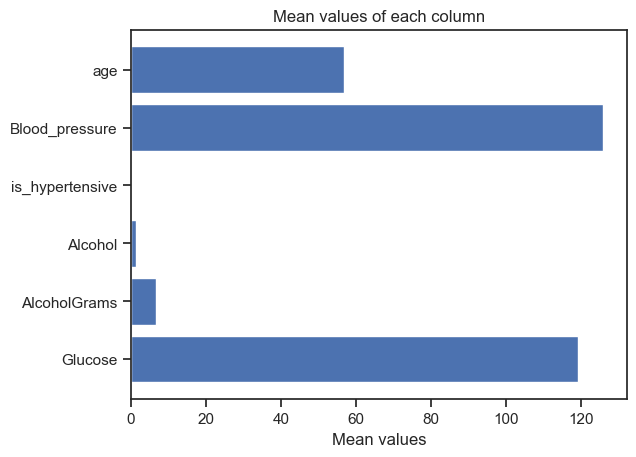

In [69]:
# Mean values of each column
means = [56.920326, 125.902680, 0.346835, 1.303121, 6.801704, 119.097587]

# Column names
columns = ['age', 'Blood_pressure', 'is_hypertensive', 'Alcohol', 'AlcoholGrams', 'Glucose']

# Create a horizontal bar plot
fig, ax = plt.subplots()
y_pos = np.arange(len(columns))
ax.barh(y_pos, means)
ax.set_yticks(y_pos)
ax.set_yticklabels(columns)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mean values')
ax.set_title('Mean values of each column')
plt.show()

In [436]:
null_values2()

Number of null values in column 'age': 0
Number of null values in column 'gender': 0
Number of null values in column 'Blood_pressure': 0
Number of null values in column 'age_group': 0
Number of null values in column 'is_hypertensive': 0
Number of null values in column 'Alcohol': 0
Number of null values in column 'AlcoholGrams': 0
Number of null values in column 'Glucose': 0


# Random Forest model

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# One-hot encode categorical features and create X and y
X = pd.get_dummies(new_model_df2[['age', 'gender', 'Alcohol', 'AlcoholGrams']])
y = new_model_df2['Glucose']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the Random Forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [71]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

# Print the first 10 predicted values
print(y_pred[:10])

[284.  70.  94. 120.  92.  66. 133.  92.  76. 118.]


In [72]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3213828425096031


# [Current Accuracy of my model: 0.31550068587105623]

In [73]:
new_model_df2.head()

,age,gender,Blood_pressure,age_group,is_hypertensive,Alcohol,AlcoholGrams,Glucose
24,61,Female,118.0,60+,0,2.0,34.2,150.0
25,61,Female,118.0,60+,0,2.0,34.2,150.0
26,61,Female,118.0,60+,0,2.0,34.2,150.0
31,26,Female,106.0,18-29,0,1.0,28.1,80.0
43,32,Male,118.0,30-44,0,1.0,0.0,84.0


# Logistic Regression model

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# One-hot encode categorical features and create X and y
X = pd.get_dummies(new_model_df2[['age', 'gender', 'Alcohol', 'AlcoholGrams']])
y = new_model_df2['Glucose']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Building the logistic regression model
lr = LogisticRegression(max_iter=5000, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Select features and target variable
X = new_model_df2[['age', 'gender', 'age_group', 'Alcohol', 'AlcoholGrams']]
y = new_model_df2['Glucose']

# Create a new dataframe with the one-hot encoded variables
new_model_df3 = pd.get_dummies(new_model_df2, columns=['gender', 'age_group'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_model_df3.drop(['Glucose'], axis=1), 
                                                    new_model_df3['Glucose'], 
                                                    test_size=0.3, random_state=42)

# Building the logistic regression model
lr = LogisticRegression(max_iter=5000, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, solver='liblinear')

,age,Blood_pressure,is_hypertensive,Alcohol,AlcoholGrams,Glucose,gender_Female,gender_Male,age_group_18-29,age_group_30-44,age_group_45-59,age_group_60+
24,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
25,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
26,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
31,26,106.0,0,1.0,28.1,80.0,1,0,1,0,0,0
43,32,118.0,0,1.0,0.0,84.0,0,1,0,1,0,0


In [76]:
# Make predictions on test data
y_pred = lr.predict(X_test)

# Evaluate model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.06911262798634812
Precision:  0.033344625440467346
Recall:  0.051144993949701435
F1 score:  0.030746082751123355


C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# K-Nearest Neighbors (KNN) model 

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select features and target variable
X = new_model_df2[['age', 'gender', 'age_group', 'Alcohol', 'AlcoholGrams']]
y = new_model_df2['Glucose']

# Create a new dataframe with the one-hot encoded variables
new_model_df3 = pd.get_dummies(new_model_df2, columns=['gender', 'age_group'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_model_df3.drop(['Glucose'], axis=1), 
                                                    new_model_df3['Glucose'], 
                                                    test_size=0.3, random_state=42)

# Building the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on test data
y_pred = knn.predict(X_test)

# Evaluate model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.4735494880546075
Precision:  0.39768491294315333
Recall:  0.4142156930771701
F1 score:  0.37939256229367885


C:\Users\joela\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 i

# Decision Trees model

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select features and target variable
X = new_model_df2[['age', 'gender', 'age_group', 'Alcohol', 'AlcoholGrams']]
y = new_model_df2['Glucose']

# Create a new dataframe with the one-hot encoded variables
new_model_df3 = pd.get_dummies(new_model_df2, columns=['gender', 'age_group'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_model_df3.drop(['Glucose'], axis=1), 
                                                    new_model_df3['Glucose'], 
                                                    test_size=0.3, random_state=42)

# Building the decision tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on test data
y_pred = dtc.predict(X_test)

# Evaluate model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.6305460750853242
Precision:  0.5582893854344935
Recall:  0.5676768945028966
F1 score:  0.5455497548515331


C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Testing Decision Tree model

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate a Decision Tree model
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

Accuracy:  0.6313993174061433


In [83]:
new_model_df3.head()

,age,Blood_pressure,is_hypertensive,Alcohol,AlcoholGrams,Glucose,gender_Female,gender_Male,age_group_18-29,age_group_30-44,age_group_45-59,age_group_60+
24,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
25,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
26,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
31,26,106.0,0,1.0,28.1,80.0,1,0,1,0,0,0
43,32,118.0,0,1.0,0.0,84.0,0,1,0,1,0,0


# Exporting the decision tree model

In [84]:
import pickle

# Export the trained model as a binary file
with open('decision_tree_model.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [86]:
new_model_df3

,age,Blood_pressure,is_hypertensive,Alcohol,AlcoholGrams,Glucose,gender_Female,gender_Male,age_group_18-29,age_group_30-44,age_group_45-59,age_group_60+
24,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
25,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
26,61,118.0,0,2.0,34.2,150.0,1,0,0,0,0,1
31,26,106.0,0,1.0,28.1,80.0,1,0,1,0,0,0
43,32,118.0,0,1.0,0.0,84.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19546,61,124.0,0,1.0,0.0,208.0,0,1,0,0,0,1
19547,61,124.0,0,1.0,0.0,208.0,0,1,0,0,0,1
19548,61,124.0,0,1.0,0.0,208.0,0,1,0,0,0,1
19549,61,124.0,0,1.0,0.0,208.0,0,1,0,0,0,1


In [93]:
import pickle

with open('decision_tree_model.pkl', 'rb') as f:
    dtc = pickle.load(f)

In [96]:
new_data = pd.read_csv('heart_cleveland_upload.csv')

In [97]:
new_data.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0


In [98]:
new_data = new_data.rename(columns={'age': 'age_group', 'sex': 'gender'})

In [99]:
new_data.head(1)

,age_group,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0


In [100]:
new_data.to_csv('new_data_processed.csv', index=False)

In [105]:
# Load the test data
test_data = pd.read_csv('new_data_processed.csv')

In [106]:
test_data.head(1)

,age_group,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0


In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv('new_data_processed.csv')

# Select features and target variable
X = data[['age_group', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['condition']

# Create a new dataframe with the one-hot encoded variables
new_data = pd.get_dummies(X, columns=['gender', 'age_group', 'cp', 'restecg', 'slope', 'thal'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.3, random_state=42)

# Building the decision tree model
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on test data
y_pred = dtc.predict(X_test)

# Evaluate model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.7333333333333333
Precision:  0.7366071428571428
Recall:  0.7366071428571428
F1 score:  0.7333333333333334


# Neural Networks model 

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Select features and target variable
X = new_model_df2[['age', 'gender', 'age_group', 'Alcohol', 'AlcoholGrams']]
y = new_model_df2['Glucose']

# Create a new dataframe with the one-hot encoded variables
new_model_df3 = pd.get_dummies(new_model_df2, columns=['gender', 'age_group'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_model_df3.drop(['Glucose'], axis=1), 
                                                    new_model_df3['Glucose'], 
                                                    test_size=0.3, random_state=42)

# Building the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000, solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on test data
y_pred = mlp.predict(X_test)

# Evaluate model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

Accuracy:  0.2901023890784983
Precision:  0.2700220288422656
Recall:  0.3020969947198737
F1 score:  0.25330952505172905


C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joela\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting Machines model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Select features and target variable
X = new_model_df2[['age', 'gender', 'age_group', 'Alcohol', 'AlcoholGrams']]
y = new_model_df2['Glucose']

# Create a new dataframe with the one-hot encoded variables
new_model_df3 = pd.get_dummies(new_model_df2, columns=['gender', 'age_group'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(new_model_df3.drop(['Glucose'], axis=1), 
                                                    new_model_df3['Glucose'], 
                                                    test_size=0.3, random_state=42)

# Building the GBM model
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)

# Make predictions on test data
y_pred = gbm.predict(X_test)

# Evaluate model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

# XGBoost classifier model

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Parkinson's disease dataset
parkinsons_data = pd.read_csv('parkinsons.csv')

# Select the features and target variable
X = parkinsons_data.drop(['name', 'status'], axis=1)
y = parkinsons_data['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', seed=42)
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))